In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
from sklearn import preprocessing 
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,3])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])  
X[:,3] = le_chol.transform(X[:,3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 0, 0, 13.093],
       [47, 1, 0, 0, 10.114],
       [28, 0, 0, 0, 7.798],
       [61, 0, 0, 0, 18.043]], dtype=object)

In [7]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [11]:
print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))

Shape of X test set (60, 5) & Size of y test set (60,)


In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
predTree = drugTree.predict(X_testset)

In [15]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugB' 'drugB' 'drugB' 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6


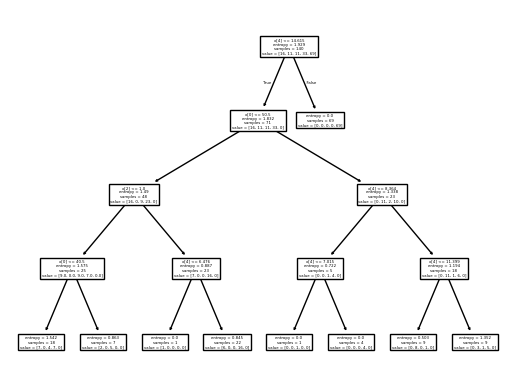

In [17]:
tree.plot_tree(drugTree)
plt.show()